# Homework 1
## Ahmet Buğra Taksuk - 2017402168

- In this homework, I tried to manipulate and visualize a multivariate time series data which is a motion data expressed in three dimensions(X-Y-Z) and provided in https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm . After reading the data, some manipulations are executed like melt function to see the data properly. After melting each axes, I transformed the acceleration information into speed and distance information to make visualizations meaningfull. For the visualization, I used matplotlib library and for the manipulations I used pandas library.
- For the first part, I used distance occured on 3D plot and most of the visualizations seemed similar to the gestures in the homework definition.
- For the second part, I represented the 3d data as 1d data using euclidian distance from the origin and also represented an axes with piecewise aggregate approximation. Eventually, I succceded to differ the classes.  

#### Reading the data

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(8,6)})

In [233]:
x = pd.read_csv("uWaveGestureLibrary_X_TRAIN", delim_whitespace=True, header = None )
y = pd.read_csv("uWaveGestureLibrary_Y_TRAIN" ,delim_whitespace=True,  header = None )
z = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", delim_whitespace=True,  header = None)


#### Data Manipulation

In [234]:
# Values are sorted with respect to class information 

x.sort_values(by = 0, inplace = True)

In [235]:
# Class Information is added to the columns from the rows

classes = x[0]
x.pop(0)
x.insert(0, "Class_ID", classes)

In [236]:
# Number of Instances is added to the columns from the rows

instances = list(range(1,897))
x.insert(0,"Instances", instances) 

In [237]:
# Melt function is used to represent the data visually better, so long version is used 

x = pd.melt(x,id_vars = ["Class_ID", "Instances"] , var_name = "Time", value_name = "Acceleration_X")

#Then Values are sorted wrt its Class, Instance and Time step information  

x.sort_values(by = ["Class_ID" ,  "Instances", "Time"] , axis = 0, inplace = True)

In [238]:
x.head()

,Class_ID,Instances,Time,Acceleration_X
0,1.0,1,1,0.244291
896,1.0,1,2,0.244291
1792,1.0,1,3,0.244291
2688,1.0,1,4,0.244291
3584,1.0,1,5,0.244291


In [239]:
# Same manipulations for the axes Y

y.sort_values(by = 0, inplace = True)
classes = y[0]
y.pop(0)
y.insert(0, "Class_ID", classes)
y.insert(0,"Instances", instances) 
y = pd.melt(y,id_vars = ["Class_ID", "Instances"] , var_name = "Time", value_name = "Acceleration_Y")
y.sort_values(by = ["Class_ID" ,  "Instances", "Time"] , axis = 0, inplace = True)


In [240]:
# Same manipulations for the axes Y

z.sort_values(by = 0, inplace = True)
classes = z[0]
z.pop(0)
z.insert(0, "Class_ID", classes)
z.insert(0,"Instances", instances) 
z = pd.melt(z,id_vars = ["Class_ID", "Instances"] , var_name = "Time", value_name = "Acceleration_Z")
z.sort_values(by = ["Class_ID" ,  "Instances", "Time"] , axis = 0, inplace = True)


#### Merging the axes

In [241]:
df = x.copy()

In [242]:
df["Acceleration_Y"] = y["Acceleration_Y"]

In [243]:
df["Acceleration_Z"] = z["Acceleration_Z"]

In [244]:
df.set_index("Time", inplace = True)

In [245]:
df[df["Class_ID"] == 1]

,Class_ID,Instances,Acceleration_X,Acceleration_Y,Acceleration_Z
Time,,,,,
1,1.0,1,0.244291,-1.252598,-0.134824
2,1.0,1,0.244291,-1.252598,-0.134824
3,1.0,1,0.244291,-1.252598,-0.134824
4,1.0,1,0.244291,-1.252598,-0.134824
5,1.0,1,0.244291,-1.252598,-0.134824
...,...,...,...,...,...
311,1.0,122,0.469526,1.108861,-0.364648
312,1.0,122,0.473398,1.108861,-0.396490
313,1.0,122,0.491843,1.108861,-0.428333


#### Feature Engineering 

In [246]:
# Adding the speed information for all axes

df["Speed_X"] = df["Acceleration_X"].cumsum()
df["Speed_Y"] = df["Acceleration_Y"].cumsum()
df["Speed_Z"] = df["Acceleration_Z"].cumsum()

In [247]:
# Adding the location information for all axes

df["Location_X"] = df["Speed_X"].cumsum()
df["Location_Y"] = df["Speed_Y"].cumsum()
df["Location_Z"] = df["Speed_Z"].cumsum()

In [248]:
df.head()

,Class_ID,Instances,Acceleration_X,Acceleration_Y,Acceleration_Z,Speed_X,Speed_Y,Speed_Z,Location_X,Location_Y,Location_Z
Time,,,,,,,,,,,
1,1.0,1,0.244291,-1.252598,-0.134824,0.244291,-1.252598,-0.134824,0.244291,-1.252598,-0.134824
2,1.0,1,0.244291,-1.252598,-0.134824,0.488581,-2.505197,-0.269647,0.732872,-3.757795,-0.404471
3,1.0,1,0.244291,-1.252598,-0.134824,0.732872,-3.757795,-0.404471,1.465743,-7.515590,-0.808942
4,1.0,1,0.244291,-1.252598,-0.134824,0.977162,-5.010393,-0.539294,2.442905,-12.525983,-1.348236
5,1.0,1,0.244291,-1.252598,-0.134824,1.221453,-6.262992,-0.674118,3.664358,-18.788975,-2.022354


## Part 1 )  Gesture Recognition
 

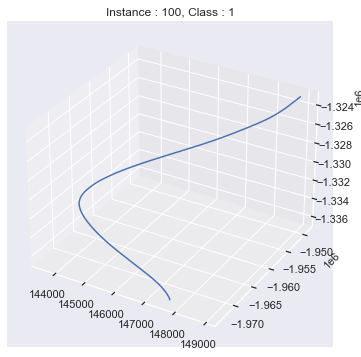

In [249]:
# Examplery Plot Code for each gesture

fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 1) & (df["Instances"] == 100)]["Location_X"]
y_data = df[(df["Class_ID"] == 1) & (df["Instances"] == 100)]["Location_Y"]
z_data = df[(df["Class_ID"] == 1) & (df["Instances"] == 100)]["Location_Z"]
plt.title("Instance : 100, Class : 1")
ax.plot3D(x_data,y_data,z_data);

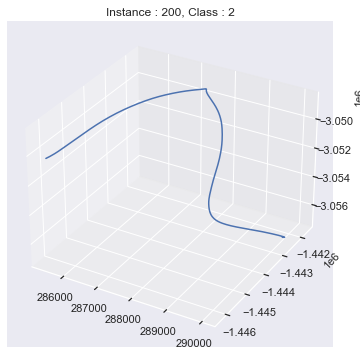

In [250]:
fig = plt.figure()
ax = plt.axes(projection='3d')
time = df[(df["Class_ID"] == 2) & (df["Instances"] ==200)].index
x_data = df[(df["Class_ID"] == 2) & (df["Instances"] == 210)]["Location_X"]
y_data = df[(df["Class_ID"] == 2) & (df["Instances"] == 210)]["Location_Y"]
z_data = df[(df["Class_ID"] == 2) & (df["Instances"] == 210)]["Location_Z"]
plt.title("Instance : 200, Class : 2")
ax.plot3D(x_data,z_data,y_data);

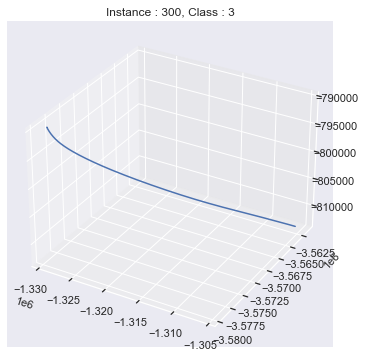

In [251]:
fig = plt.figure()
ax = plt.axes(projection='3d')
time = df[(df["Class_ID"] == 3) & (df["Instances"] == 300)].index
x_data = df[(df["Class_ID"] == 3) & (df["Instances"] == 306)]["Location_X"]
y_data = df[(df["Class_ID"] == 3) & (df["Instances"] == 306)]["Location_Y"]
z_data = df[(df["Class_ID"] == 3) & (df["Instances"] == 306)]["Location_Z"]
plt.title("Instance : 300, Class : 3")
ax.plot3D(x_data,y_data,z_data);

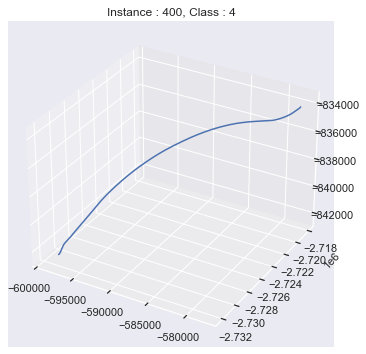

In [252]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 4) & (df["Instances"] == 400)]["Location_X"]
y_data = df[(df["Class_ID"] == 4) & (df["Instances"] == 400)]["Location_Y"]
z_data = df[(df["Class_ID"] == 4) & (df["Instances"] == 400)]["Location_Z"]
plt.title("Instance : 400, Class : 4")
ax.plot3D(x_data,y_data,z_data);

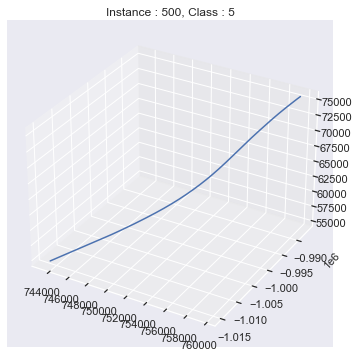

In [253]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 5) & (df["Instances"] == 500)]["Location_X"]
y_data = df[(df["Class_ID"] == 5) & (df["Instances"] == 500)]["Location_Y"]
z_data = df[(df["Class_ID"] == 5) & (df["Instances"] == 500)]["Location_Z"]
plt.title("Instance : 500, Class : 5")
ax.plot3D(x_data,y_data,z_data);

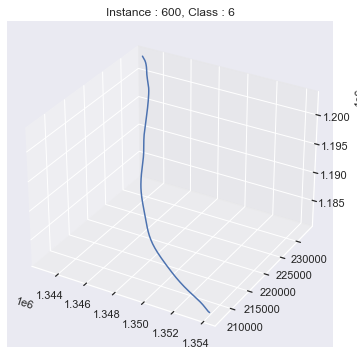

In [254]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 6) & (df["Instances"] == 600)]["Location_X"]
y_data = df[(df["Class_ID"] == 6) & (df["Instances"] == 600)]["Location_Y"]
z_data = df[(df["Class_ID"] == 6) & (df["Instances"] == 600)]["Location_Z"]
plt.title("Instance : 600, Class : 6")
ax.plot3D(x_data,y_data,z_data);

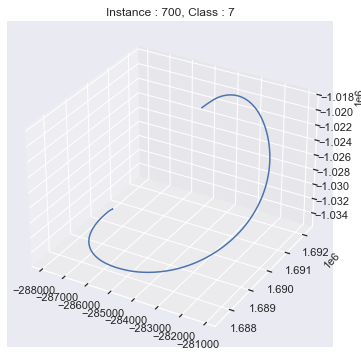

In [255]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 7) & (df["Instances"] == 700)]["Location_X"]
y_data = df[(df["Class_ID"] == 7) & (df["Instances"] == 700)]["Location_Y"]
z_data = df[(df["Class_ID"] == 7) & (df["Instances"] == 700)]["Location_Z"]
plt.title("Instance : 700, Class : 7")
ax.plot3D(z_data,x_data,y_data);

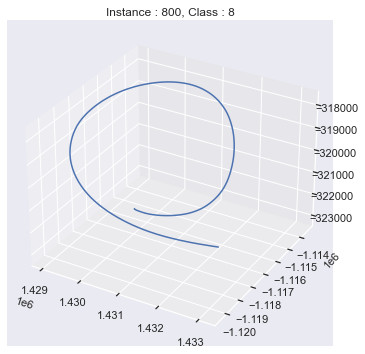

In [256]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = df[(df["Class_ID"] == 8) & (df["Instances"] == 800)]["Location_X"]
y_data = df[(df["Class_ID"] == 8) & (df["Instances"] == 800)]["Location_Y"]
z_data = df[(df["Class_ID"] == 8) & (df["Instances"] == 800)]["Location_Z"]
plt.title("Instance : 800, Class : 8")
ax.plot3D(x_data,y_data,z_data);

- For this part, except some of the cases like class 2 and class 3, all plots seemed similar to the gestures defined in the homework description.

## Part 2 ) Representation of the data
- For the first representation, I calculated each points' euclidian distance to the origin and added this information to the columns for every time step. Then, for every time step and class, I calculated the average values of distance. After plotting the average distances, we are able to see that the mean averages are different for every class.  

In [257]:
# Euclidian distance to the origin of the every point for every time step and every class. 

df["Distance"] = np.sqrt((df["Location_X"] - 0)**2 + (df["Location_Y"] - 0)**2 + (df["Location_Z"] - 0)**2)

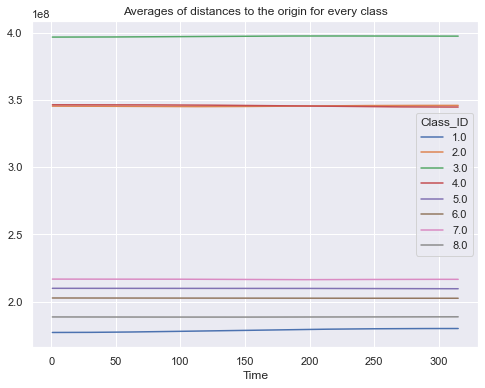

In [258]:
df.pivot_table(index='Time',columns='Class_ID',values='Distance',aggfunc='sum').plot()
plt.title("Averages of distances to the origin for every class")
plt.show();

- For the second representation,I aplied PAA to only one axes which is X axes. First I normalized the values and applied piecewise function to score each class's X location. After scoring the values, I plotted all scored values and tried to identify the classes. 

In [259]:
# First I need to normalize the location values for x axes

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [260]:
# Here I used pivot table to use average X values for every time step since there are 819 instances with respect to Class ID's

normalized = normalize(df.pivot_table(index='Time',columns='Class_ID',values='Location_X',aggfunc='mean'))

In [261]:
normalized.head()

Class_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Time,,,,,,,,
1,0.621546,0.611189,1.000000,0.000000,0.000000,0.000000,0.797488,0.241719
2,0.621411,0.611373,0.999926,0.000081,0.000070,0.000093,0.797700,0.241536
3,0.621209,0.611652,0.999815,0.000203,0.000174,0.000231,0.798017,0.241261
4,0.620939,0.612025,0.999666,0.000365,0.000314,0.000415,0.798441,0.240894
5,0.620603,0.612493,0.999481,0.000567,0.000488,0.000646,0.798970,0.240435


<AxesSubplot:>

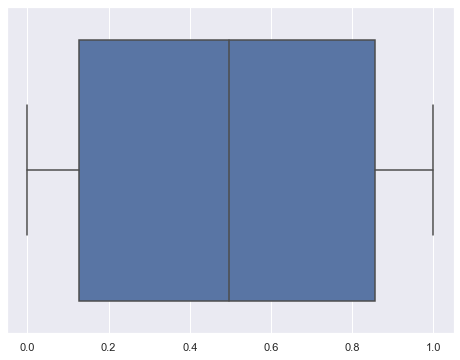

In [262]:
# Then I checked boxplot of the location values of X axes to decide on intervals of piecewise function

sns.boxplot(normalized.values)

In [263]:
# After deciding the intervals, I scored every interval on set [-2,2] using "piecewise" function in numpy library.
# Then I added these scored values for each class to an array  

graphs = []
time = df[df["Class_ID"] == 1]["Location_X"].index
for i in range(1,9):
    x_data = normalized[i]
    x_data = np.array(x_data)
    graphs.append(np.piecewise(x_data, [(x_data < 0.2), ((x_data >= 0.2) & (x_data <0.4 )), ((x_data >= 0.4) & (x_data <0.6 )), ((x_data >= 0.6) & (x_data <0.8 )), (x_data>=0.8)], [-2, -1, 0, 1,2]))

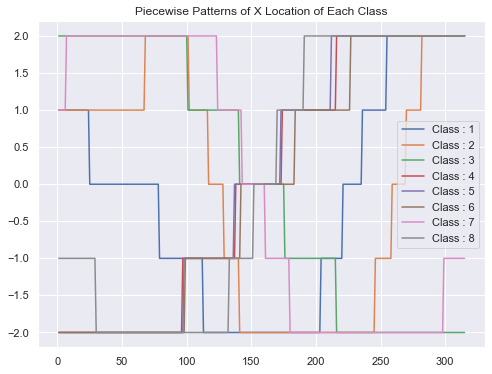

In [264]:
# Plotting the scored values

for i in range(1,9):
    plt.plot(list(range(1,316)),graphs[i-1], label=f'Class : {i}')
plt.title("Piecewise Patterns of X Location of Each Class")
plt.legend()
plt.show();

### Conclusion 

- To compare both representations, I would prefer piecewise method because it gives more specific patterns even though we dealed with just one axes. Therefore, using all axes and using more detailed intervals, piecewise method is easier to identify the classes. 